In [12]:
import pandas as pd

In [82]:
import pyorc
file = open("orc/temperature.orc", "rb")
reader = pyorc.Reader(file)
columns = reader.schema.fields
data = pd.DataFrame(reader, columns=columns)

In [85]:
explainedColumnName = 'Diabetic'
with pd.option_context('display.float_format', '{:.2f}'.format, 'display.max_rows', None, 'display.max_columns', None):
    display(data.head())
data[data<0] = abs(data)
copy_data = data
data[data>200] = data/10
data[data>50] = data/2
data.head()

,MTK1-mean,MTK2-mean,MTK3-mean,MTK4-mean,MTK5-mean,D1-mean,L-mean,C-mean,MTK1-min,MTK2-min,MTK3-min,MTK4-min,MTK5-min,D1-min,L-min,C-min,MTK1-max,MTK2-max,MTK3-max,MTK4-max,MTK5-max,D1-max,L-max,C-max,Toes-mean,Toes-min,Toes-max,Foot-mean,Foot-min,Foot-max,Diabetic
0,23.02,21.38,22.84,22.51,22.06,21.21,25.17,22.86,22.98,20.69,22.12,21.93,21.64,20.67,24.46,22.93,23.03,21.67,23.17,22.84,22.32,21.48,25.57,22.78,17.10,16.50,17.45,6.66,7.29,6.26,0.00
1,23.99,21.88,21.54,21.55,21.01,19.51,23.80,23.85,23.96,21.51,21.05,21.00,20.78,18.99,21.93,23.93,24.01,22.12,22.12,22.01,21.31,19.76,24.69,23.79,16.34,15.69,16.77,8.39,9.19,7.90,0.00
2,23.14,22.37,23.72,23.67,23.41,22.77,25.64,22.84,23.05,21.39,22.67,22.19,21.86,21.85,23.98,22.99,23.18,22.97,24.46,24.65,24.28,23.31,26.54,22.71,18.07,16.82,18.86,5.82,7.14,4.97,0.00
3,24.12,22.74,22.10,22.17,22.04,20.82,24.15,23.86,24.02,21.53,20.66,20.73,20.98,19.81,22.45,24.06,24.17,23.45,23.01,23.16,22.77,21.47,25.30,23.74,17.08,15.72,17.93,7.78,9.24,6.87,0.00
4,23.34,25.84,26.92,26.66,25.20,26.12,26.46,22.96,23.31,25.54,26.71,26.42,24.55,25.34,24.91,23.20,23.36,26.02,27.18,26.88,25.45,26.45,26.97,22.77,20.13,19.33,20.60,4.21,5.25,3.60,0.00


,MTK1-mean,MTK2-mean,MTK3-mean,MTK4-mean,MTK5-mean,D1-mean,L-mean,C-mean,MTK1-min,MTK2-min,...,D1-max,L-max,C-max,Toes-mean,Toes-min,Toes-max,Foot-mean,Foot-min,Foot-max,Diabetic
0,23.017078,21.376146,22.837803,22.505702,22.061661,21.213134,25.165134,22.857023,22.978950,20.688329,...,21.482747,25.567242,22.778746,17.095016,16.495895,17.449056,6.664497,7.290388,6.262777,0.0
1,23.987777,21.881397,21.542566,21.554571,21.011310,19.511515,23.804783,23.846278,23.956575,21.509118,...,19.762107,24.688568,23.789911,16.340142,15.687493,16.773089,8.393685,9.189921,7.902583,0.0
2,23.137237,22.365993,23.720531,23.666080,23.409840,22.769989,25.637145,22.839018,23.046212,21.392943,...,23.306960,26.543022,22.713256,18.068971,16.816515,18.863942,5.820127,7.136280,4.967801,0.0
3,24.120970,22.737719,22.098455,22.173519,22.039741,20.817460,24.154678,23.861206,24.021482,21.528849,...,21.471204,25.301154,23.744601,17.077402,15.718445,17.925243,7.783816,9.243281,6.874291,0.0
4,23.341150,25.840460,26.916966,26.655982,25.201193,26.118998,26.462671,22.959936,23.311243,25.544871,...,26.454720,26.970140,22.774636,20.126052,19.325828,20.597915,4.212827,5.245473,3.599290,0.0


## WIZUALIZACJA DANYCH

### BOXPLOTY

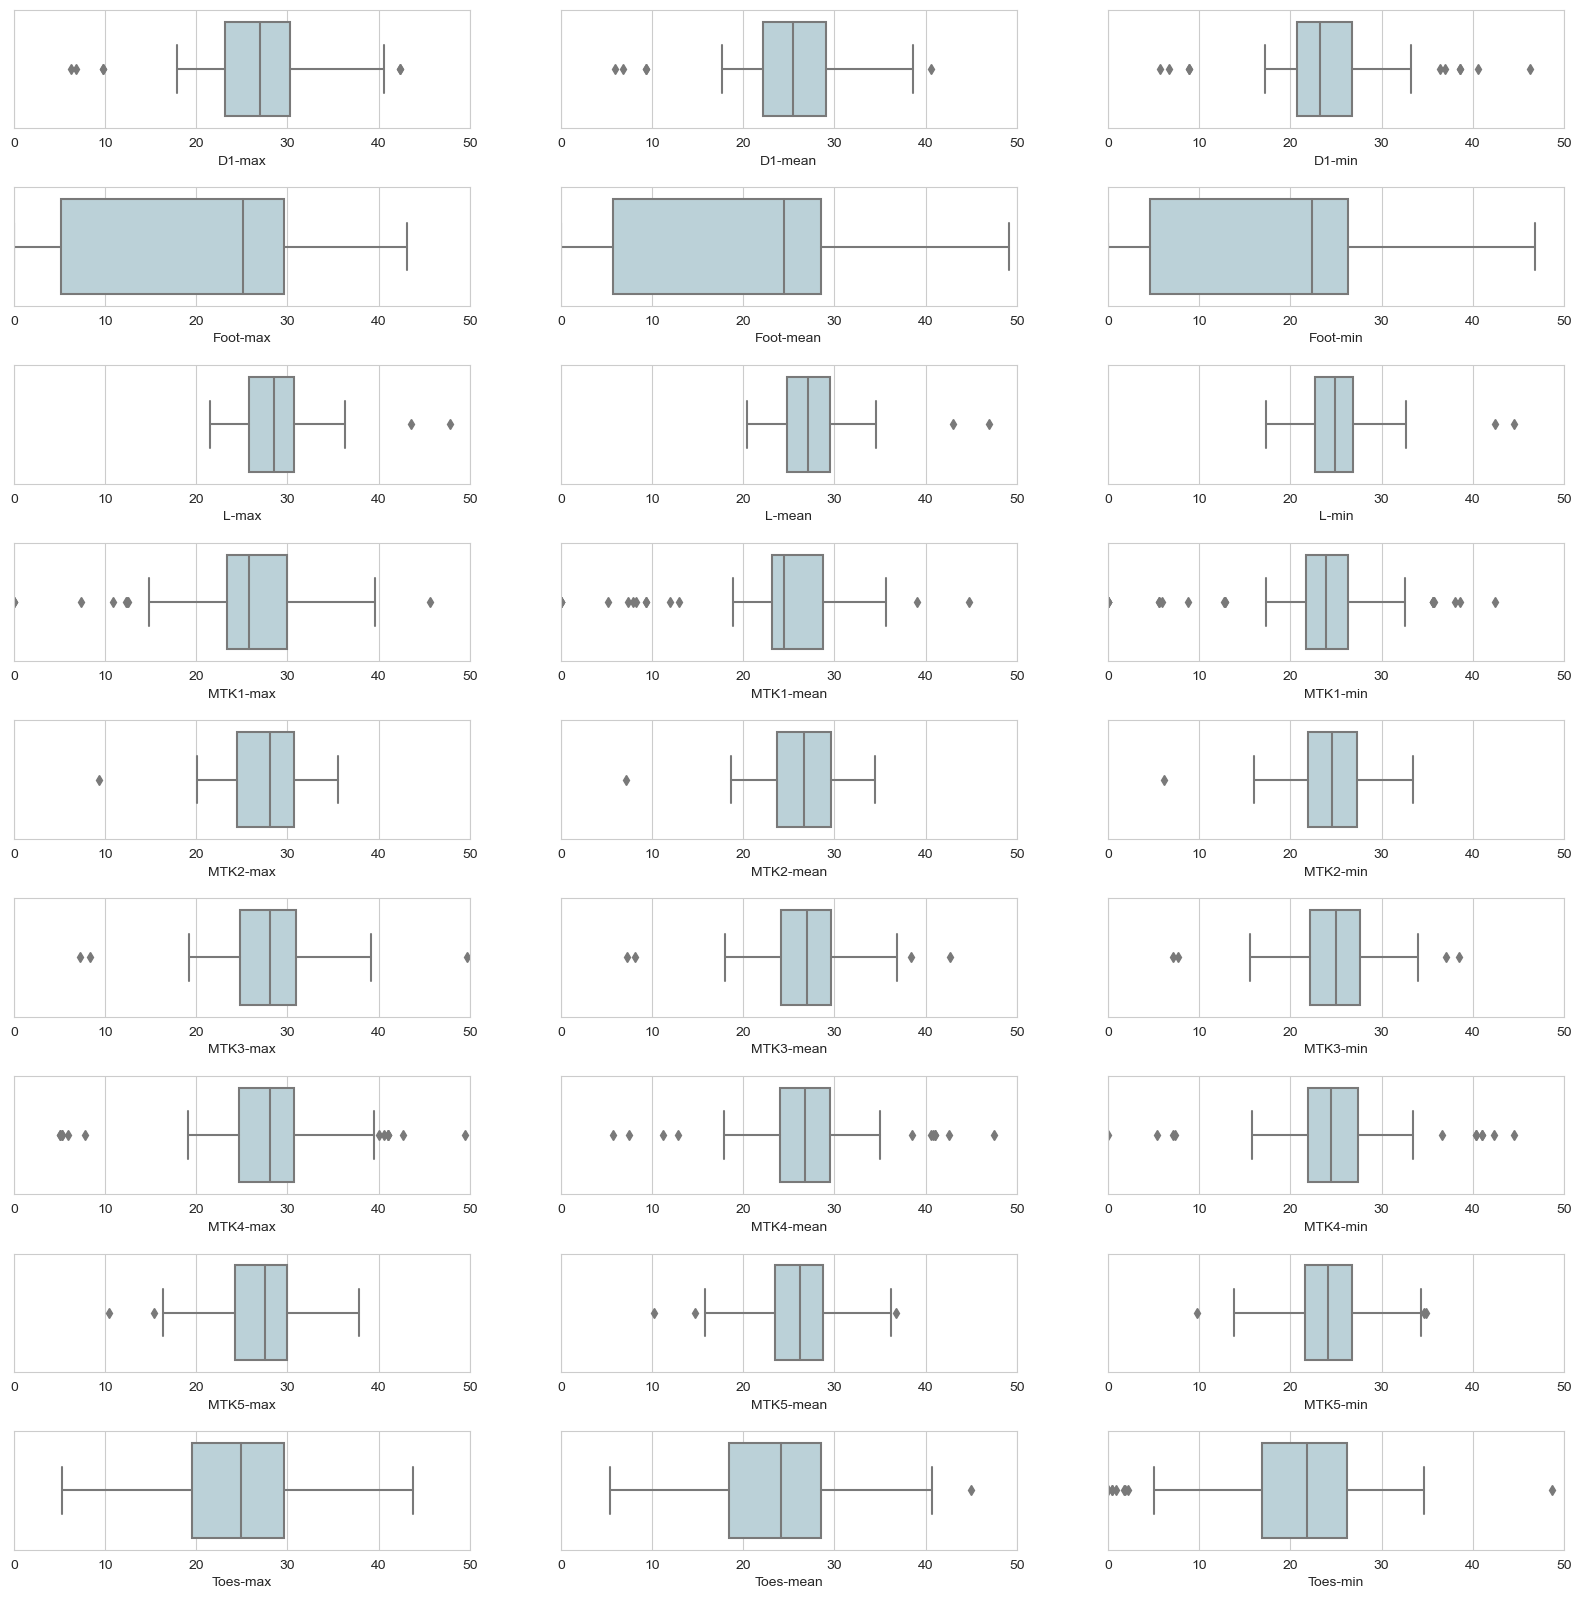

In [71]:
from matplotlib import pyplot as plt
import seaborn as sns
columns = data.columns[:-1]
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(20, 20))
axes = axes.flatten()
for i, column in enumerate(columns.sort_values()[3:]):
    # boxplot with scale 0 -4000
    sns.boxplot(data, x=column, ax=axes[i], color='lightblue', saturation=0.5)
    fig.subplots_adjust(hspace=0.5)
    axes[i].set(xlim=(0, 50))
    axes[i].set_ylabel('')
plt.show()

### HISTOGRAMY

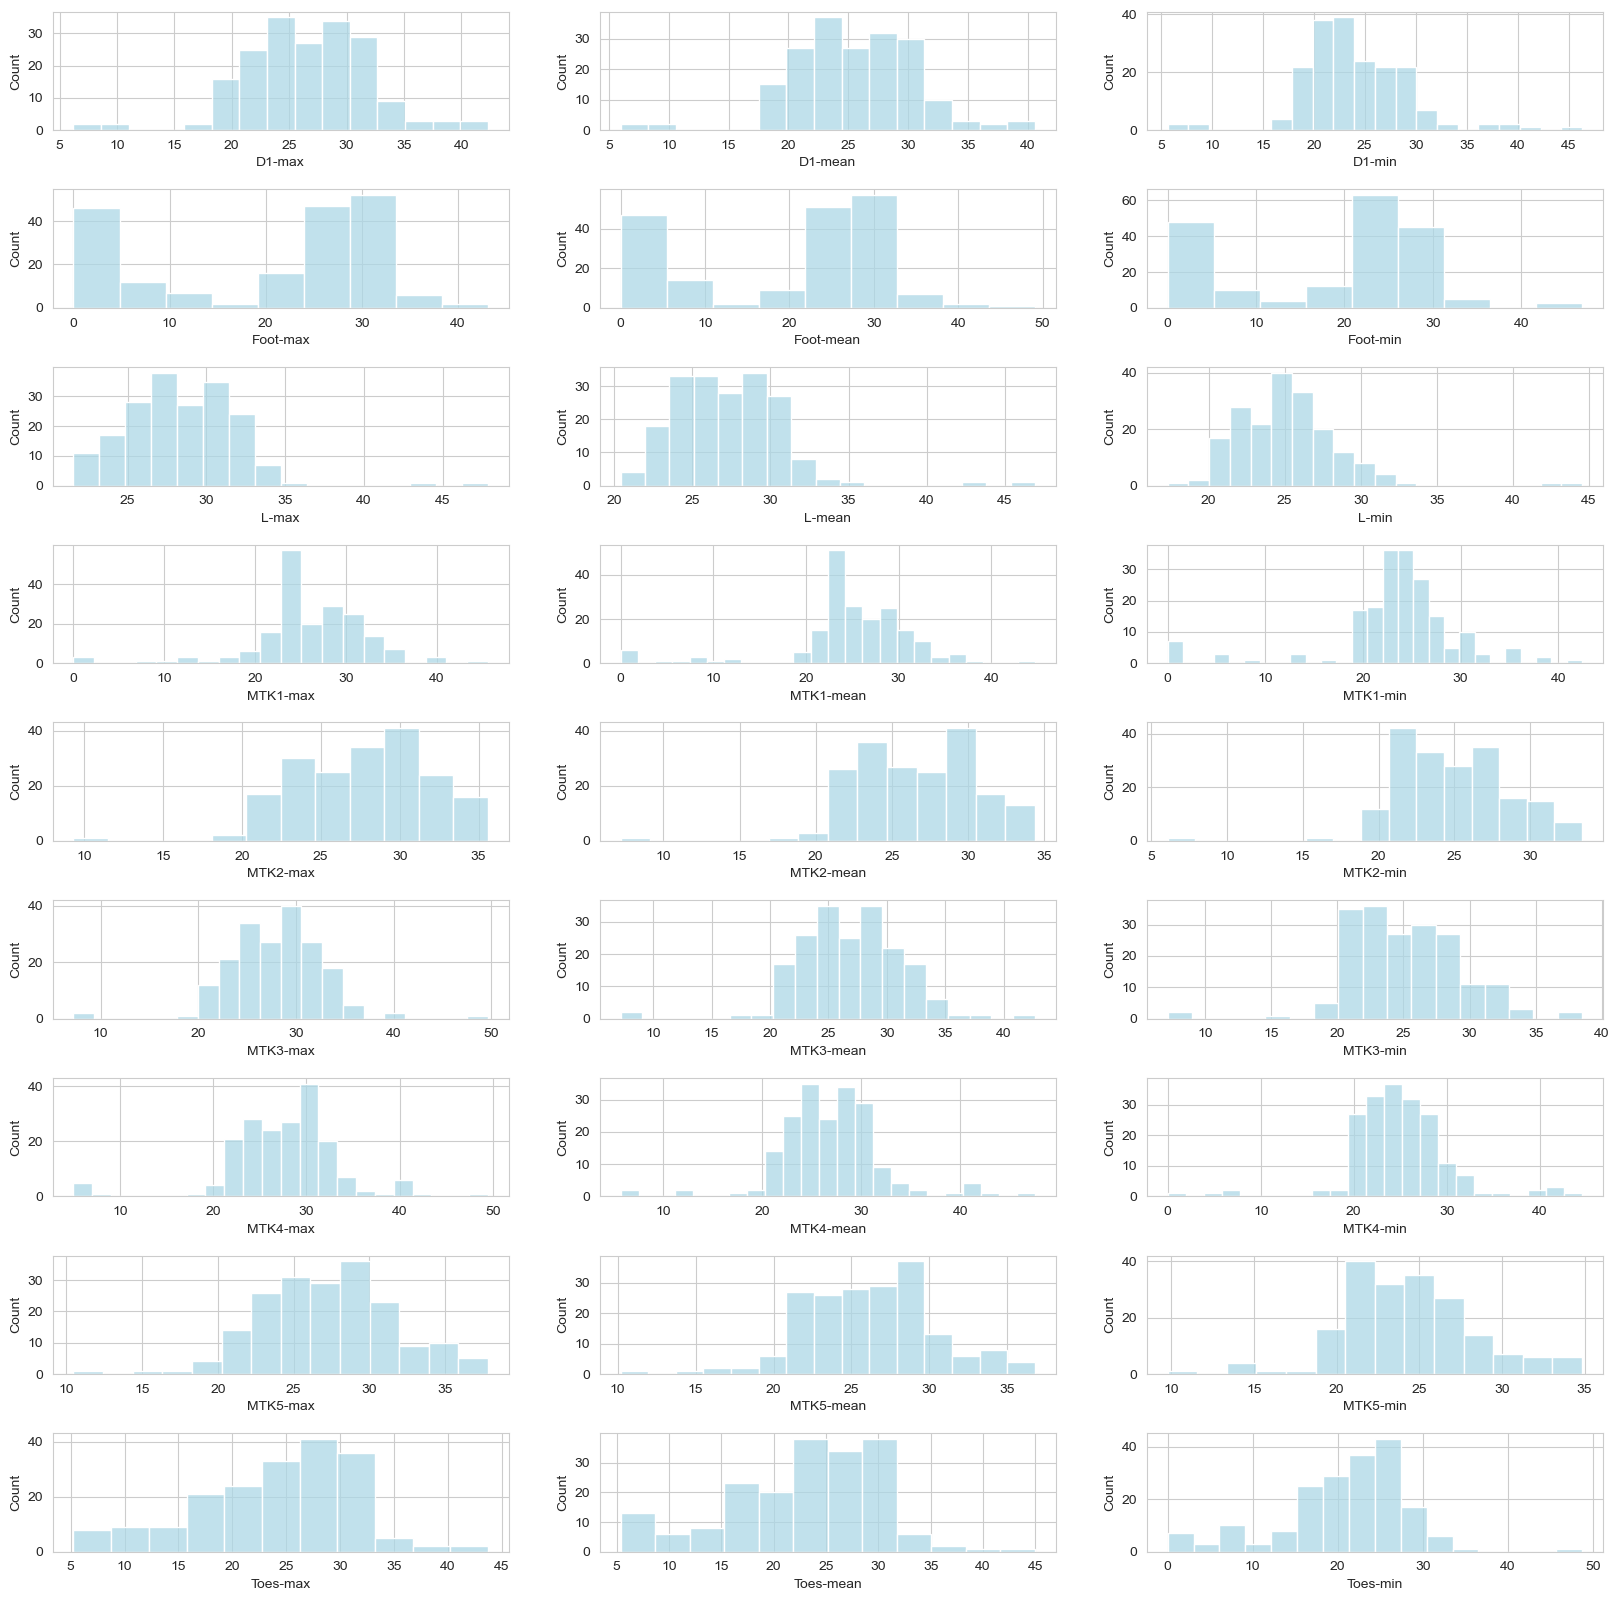

In [72]:
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(20, 20))
axes = axes.flatten()
for i, column in enumerate(columns.sort_values()[3:]):
    sns.histplot(data, x=column, ax=axes[i], color='lightblue')
    fig.subplots_adjust(hspace=0.5)
plt.show()


<Axes: xlabel='Diabetic', ylabel='Count'>

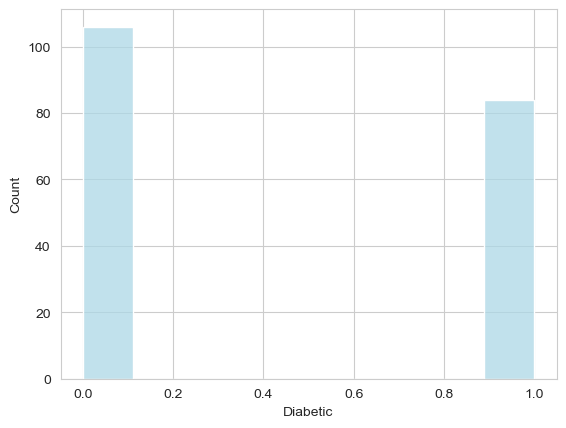

In [73]:
sns.histplot(data, x="Diabetic", color='lightblue')

### PAIR PLOT

In [95]:
data_pairplot_1 = data[
    ['L-mean',
     'D1-mean',
     'MTK1-mean',
     'MTK3-mean',
     'Diabetic']]
data_pairplot_2 = data[[
    'L-min',
    'D1-min',
    'MTK1-min',
    'MTK3-min',
    'Diabetic']]
data_pairplot_3 = data[[
    'L-max',
    'D1-max',
    'MTK1-max',
    'MTK3-max',
    'Diabetic']]
data_pairplot = data_pairplot_3

In [96]:
diabetic_sample = data_pairplot[data_pairplot[explainedColumnName] == 1]
non_diabetic_sample = data_pairplot[data_pairplot[explainedColumnName] == 0]
data_pairplot_sample = pd.concat([diabetic_sample, non_diabetic_sample], ignore_index=True)

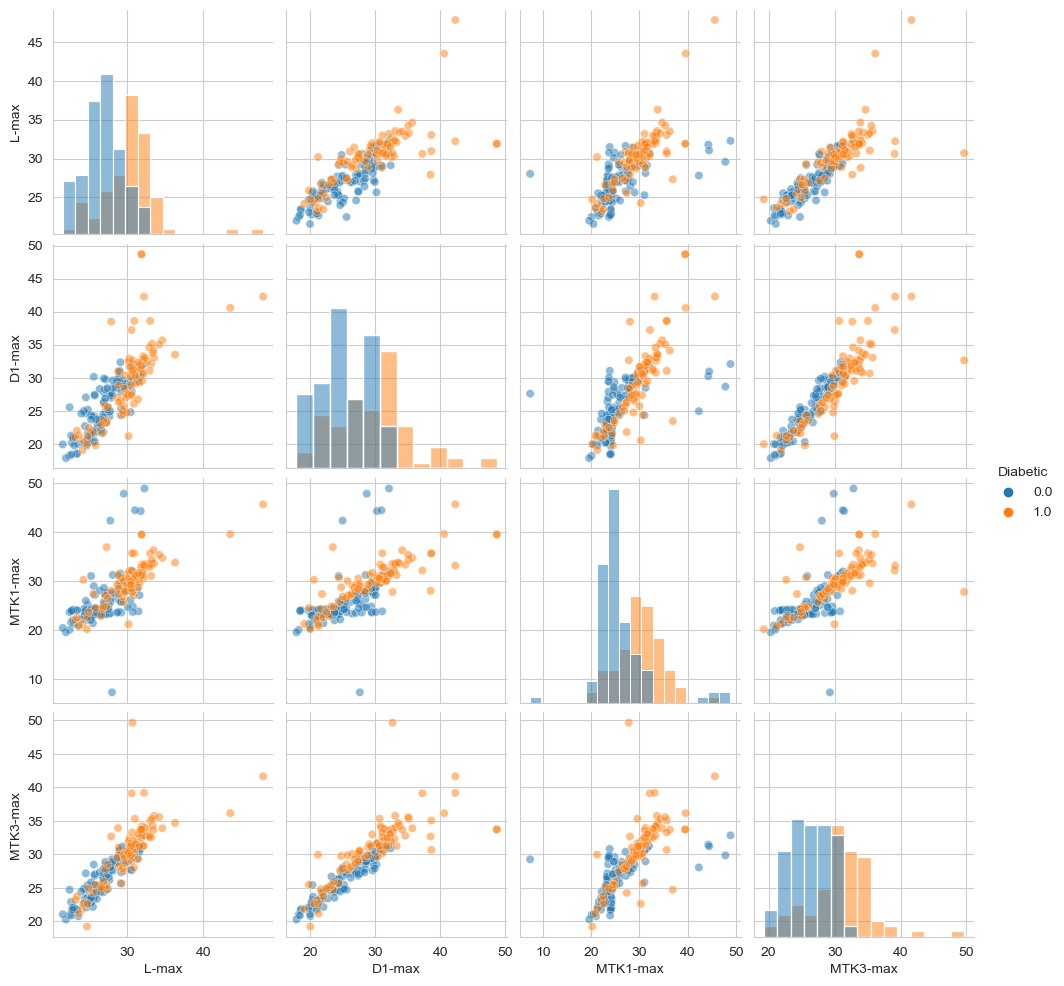

In [97]:
sns.pairplot(data_pairplot, hue=explainedColumnName, diag_kind='hist', plot_kws={'alpha': 0.5})

### SCATTER PLOT

In [98]:
import plotly.express as px
fig = px.scatter(data, x="Toes-mean", y="L-mean", color="Diabetic", size="D1-mean",
                 hover_data=[explainedColumnName])
fig.show(renderer="browser")

fig = px.scatter(data, x="Toes-min", y="L-min", color="Diabetic", size="D1-min",
                 hover_data=[explainedColumnName])
fig.show()
fig.show(renderer="browser")

fig = px.scatter(data, x="Toes-max", y="L-max", color="Diabetic", size="D1-max",
                 hover_data=[explainedColumnName])
fig.show()

fig.show(renderer="browser")


### MACIERZ KORELACJI

In [90]:
corr_matrix = data.corr()

corr_matrix = corr_matrix.drop(columns=['C-mean', 'C-min', 'C-max'])
corr_matrix = corr_matrix.drop(index=['C-mean', 'C-min', 'C-max'])



<Axes: >

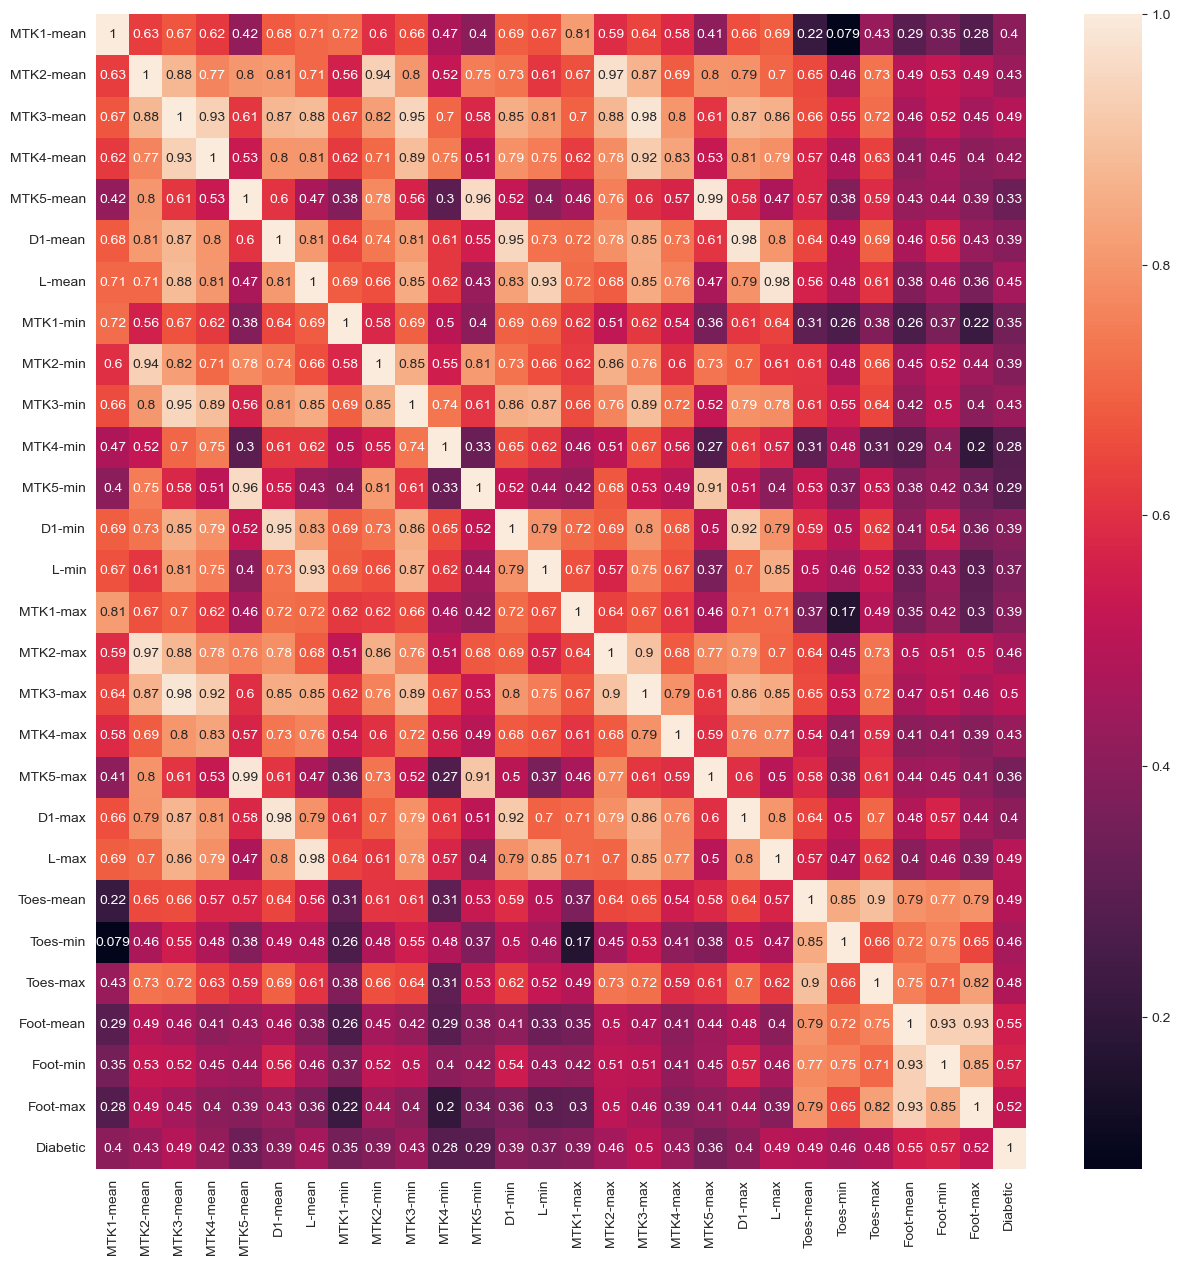

In [91]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, ax=ax)